<div style="background-color:Maroon;">
   
<br>    
<p style="text-align:center">
    <a href="https://www.tamu.edu/" target="_blank">
    <img src="https://www.tamu.edu/assets/images/TAM-Logo-white.png" width="200" alt="TAM-Logo-white.png"  /> 
    </a>
</p>
<br> 
<p style="text-align:center">
<h1 style="color:White;line-height:.2"><center>FINAL PROJECT </center> </h1>
<h3 style="color:White;line-height:.2"><center>Allison Moore </center> </h3>
<h3 style="color:White;line-height:.2"><center>620007444</center> </h3>
<h2 style="color:White;line-height:.8"><center>STAT 689, Section 700  Spring 2023</center> </h2>  
</p>
</div>


# Administrative Tasks & Pre-processsing 


In [5]:
#Import all necessary libraries
#Unfortunately, you must install pingouin and phik every instance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

plt.style.use('seaborn-darkgrid')
import warnings
#!pip install pingouin
#import pingouin as pg

import phik
warnings.filterwarnings("ignore")

In [7]:
#Read in data
df_s=pd.read_csv(r"C:\Users\sweep\Documents\Masters\TAMU\689\Final\standard_method.csv")
df_d=pd.read_csv(r"C:\Users\sweep\Documents\Masters\TAMU\689\Final\DisntanceVariance_method.csv")

In [11]:
print("Standard Method\n\n")
print(df_s.isna().sum())
print("\n\nDistance Method\n\n")
print(df_d.isna().sum())

Standard Method


slope_1     0
slope_2     0
slope_3     0
slope_4     0
slope_5     0
slope_6     0
slope_7     0
slope_8     0
slope_9     0
slope_10    0
slope_11    0
slope_12    0
slope_13    0
slope_14    0
slope_15    0
slope_16    0
slope_17    0
slope_18    0
slope_19    0
slope_20    0
slope_21    0
slope_22    0
slope_23    0
slope_24    0
slope_25    0
slope_26    0
slope_27    0
slope_28    0
slope_29    0
state       0
dtype: int64


Distance Method


slope_1     0
slope_2     0
slope_3     0
slope_4     0
slope_5     0
slope_6     0
slope_7     0
slope_8     0
slope_9     0
slope_10    0
slope_11    0
slope_12    0
slope_13    0
slope_14    0
slope_15    0
slope_16    0
slope_17    0
slope_18    0
slope_19    0
slope_20    0
slope_21    0
slope_22    0
slope_23    0
slope_24    0
slope_25    0
slope_26    0
slope_27    0
slope_28    0
slope_29    0
state       0
dtype: int64


<div style="background-color:Black;">
    <h4> </h4>   
<h1 style="color:White;line-height:1.2""><center>Exploratory Data Analysis </center> </h1>

</div>


# Basic Stats and Associations- Kim

In [ ]:
#Basic Information about the data
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,...,42535.000000,42535.000000,42535.000000,42535.0,42535.0,42535.000000,42535.0,42535.000000,42535.000000,42535.000000
mean,11089.722581,10821.585753,10139.830603,12.165016,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,...,99.988914,13.899371,2611.809119,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,7410.938391,7146.914675,7131.686446,3.707936,208.927216,6.409334e+04,6.726315,0.512232,1.526934,4.494741,...,716.814935,159.443877,4385.415780,0.0,0.0,0.009697,0.0,29.349569,0.205361,0.004849
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,9.630000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,...,0.000000,0.000000,211.460000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,11.990000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,...,0.000000,0.000000,527.320000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.720000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,...,0.000000,0.000000,3167.855000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


interval columns not set, guessing: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


Text(0.5, 1.0, 'Phik Matrix')

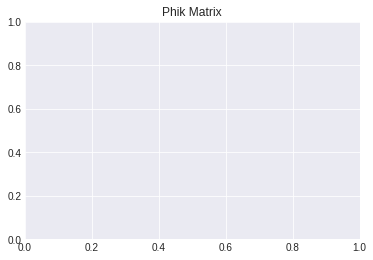

In [ ]:
cm = df.phik_matrix()
plt.title("Phik Matrix")


<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

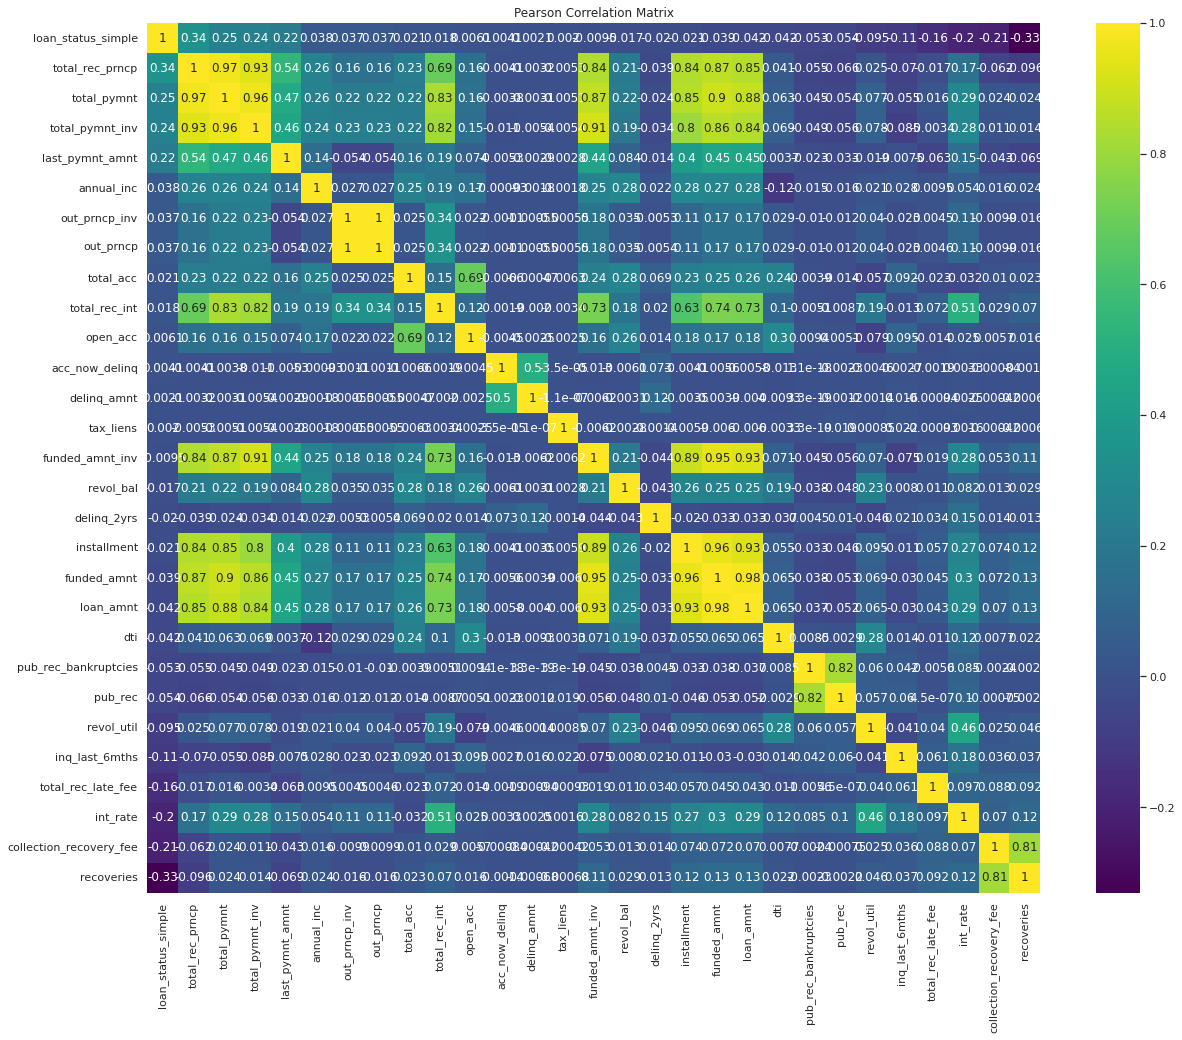

In [ ]:
#Quality correlation matrix--- Must only use numeric variables
#Input selected response variable in cols. Returns a corr matrix sorted by how strong the relationship is between the response and all other variables.
k = 32#number of variables for heatmap
cols = df_num.corr().nlargest(k, 'loan_status_simple')['loan_status_simple'].index
cm = df_num[cols].corr()
plt.figure(figsize=(20,16))
plt.title("Pearson Correlation Matrix")
sns.heatmap(cm, annot=True, cmap = 'viridis')

#other cmap color options found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:title={'center':'Spearman Correlation Matrix'}>

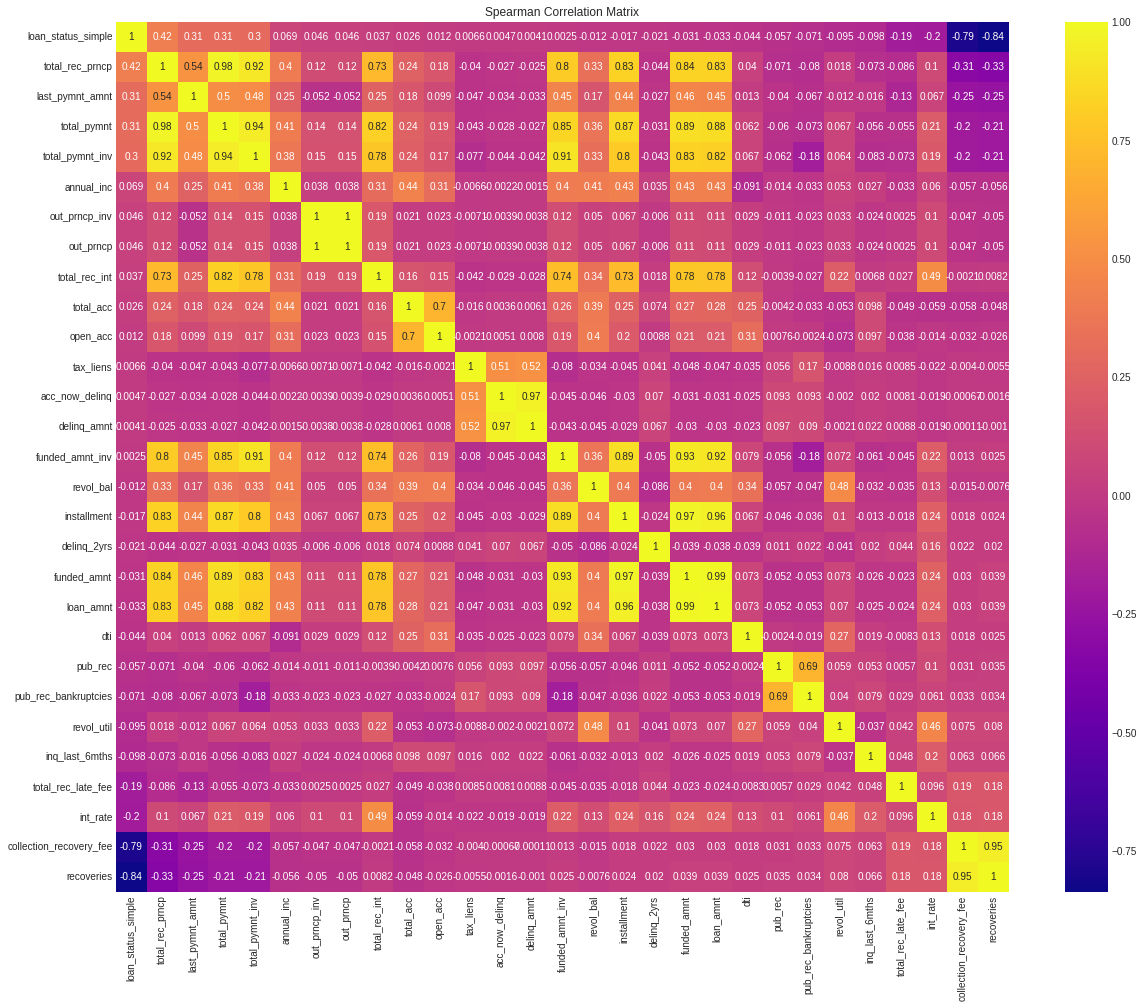

In [ ]:
#Spearman Correlation Matrix
k = 32 #number of variables for heatmap
cols = df_num.corr(method='spearman').nlargest(k, 'loan_status_simple')['loan_status_simple'].index
cm = df_num[cols].corr(method='spearman')
plt.figure(figsize=(20,16))
plt.title("Spearman Correlation Matrix")
sns.heatmap(cm, annot=True, cmap = 'plasma')

In [ ]:
#Select only some of the parameters to use based on correlation, if you want to work with narrowed parameters
#Updated to include top 5 positive and top 5 negative correlations
#nlargest uses 6 to include the response variable
cols = df_num.corr().nlargest(6, 'loan_status_simple')['loan_status_simple'].index
col2=df_num.corr().nsmallest(5,'loan_status_simple')['loan_status_simple'].index
cols=cols.append(col2)
x=df_num[cols]
x.head()

,loan_status_simple,total_rec_prncp,total_pymnt,total_pymnt_inv,last_pymnt_amnt,annual_inc,recoveries,collection_recovery_fee,int_rate,total_rec_late_fee,inq_last_6mths
0,1,5000.00,5863.155187,5833.84,171.62,24000.0,0.00,0.00,10.65,0.00,1.0
1,0,456.46,1008.710000,1008.71,119.66,30000.0,117.08,1.11,15.27,0.00,5.0
2,1,2400.00,3005.666844,3005.67,649.91,12252.0,0.00,0.00,15.96,0.00,2.0
3,1,10000.00,12231.890000,12231.89,357.48,49200.0,0.00,0.00,13.49,16.97,1.0
4,1,2664.90,3716.700000,3716.70,67.79,80000.0,0.00,0.00,12.69,0.00,0.0


# Distribution Analysis- Irbaz

[Text(0.5, 1.0, 'Frequencies of Trimmed Loan Status')]

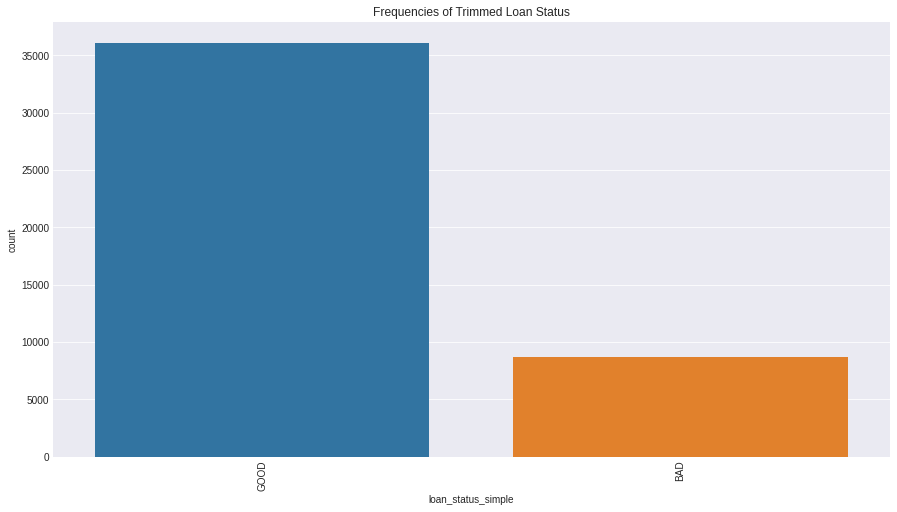

In [ ]:
#Search for Response variable options
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
  #df_num.sort_values(by=['funded_amnt']).head(20)
  #df[(df['funded_amnt']/df['loan_amnt'])<=1].id.count()
  #(df['funded_amnt']/df['loan_amnt']).plot.hist(bins=4,xlim=(0,1))
sns.countplot(x=df['grade']).set(title='Frequencies of Loan Grades')
sns.countplot(x=df['loan_status']).set(title='Frequencies of Loan Status')
sns.countplot(x=df['loan_status_simple']).set(title='Frequencies of Trimmed Loan Status')


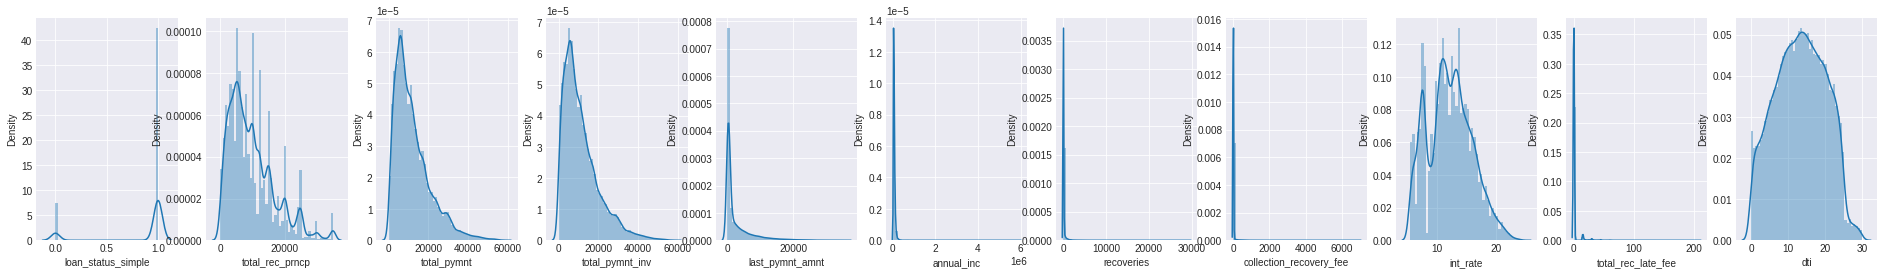

In [ ]:
#Skewness
#Update with selected paramters
l = x.columns.values
number_of_columns=11
number_of_rows=50
plt.figure(figsize=(3*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    try:
        sns.distplot(x[l[i]],kde=True) 
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            sns.distplot(x[l[i]], kde_kws={'bw': 0.1})
        else:
            raise re

QQ Plots, Discussion on Distributions

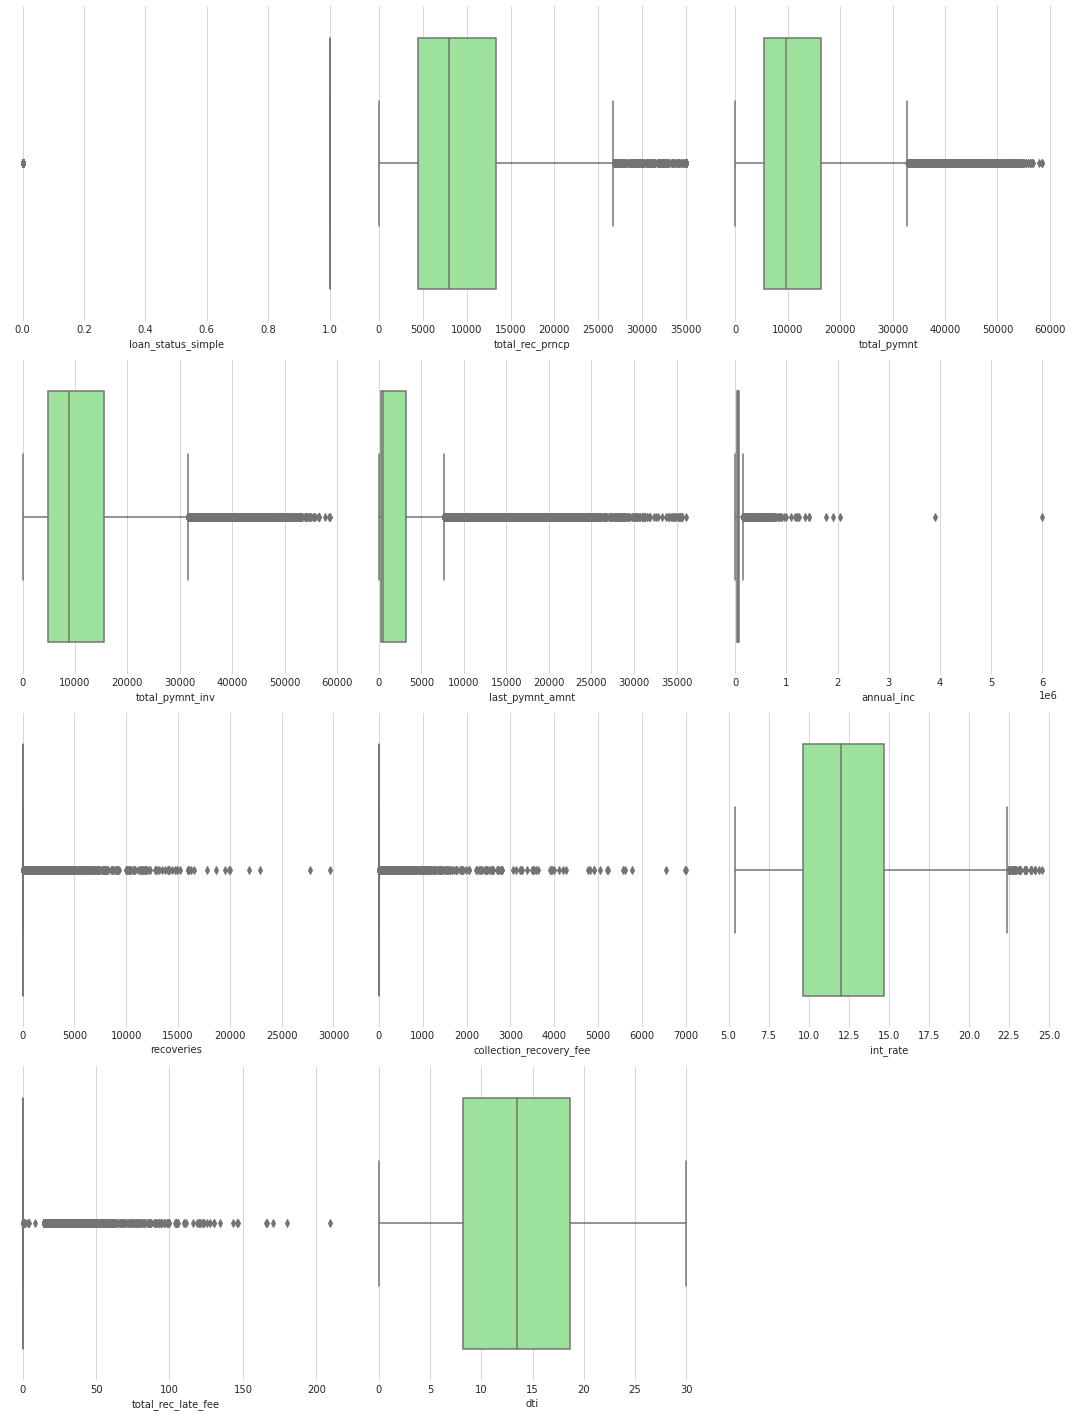

In [ ]:
#Outliers
#Update with selected parameters

#Can show each parameter individually within the same plot, or collectively (next code block)
l = x.columns.values
number_of_columns=3
number_of_rows = 50
plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
sns.set_style('whitegrid')
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.boxplot(x[l[i]],color='lightgreen',orient='h')
    plt.tight_layout()

<AxesSubplot:>

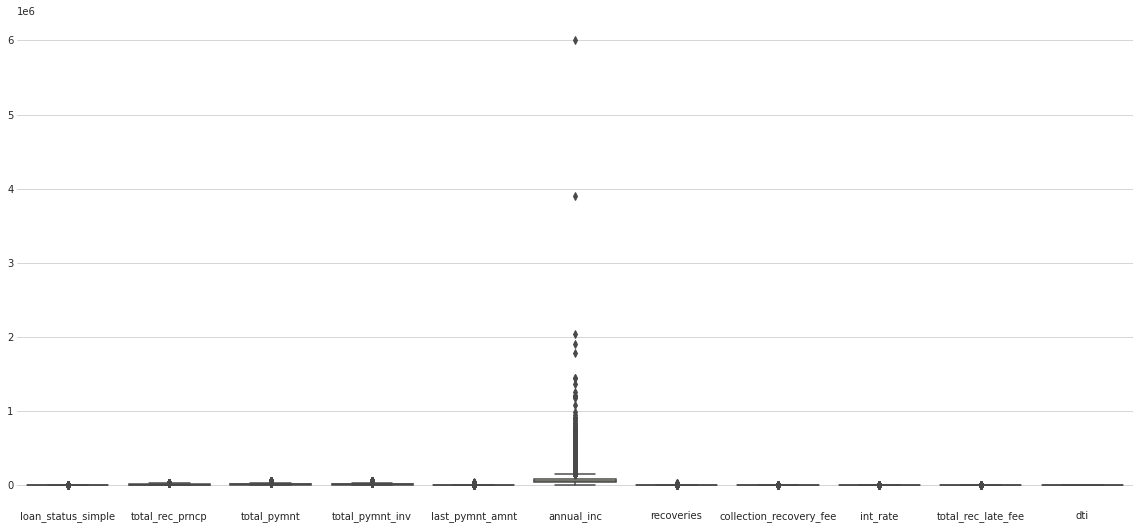

In [ ]:
#Or display all parameters on the same plot
plt.figure(figsize=(20,9))
sns.boxplot(data=x, orient='v', palette='Spectral')
#Find more colors for the palette here: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

# Data Visualization- Allison

Other Visualizations Section - Allison

## CrossTab Analysis

### Grade CrossTab

In [ ]:
pd.crosstab(columns=df_cat['grade'], index=df_cat['loan_status_simple'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

grade,A,B,C,D,E,F,G,All
loan_status_simple,,,,,,,,
BAD,6.00%,12.25%,17.20%,22.02%,26.05%,31.98%,33.79%,15.12%
GOOD,94.00%,87.75%,82.80%,77.98%,73.95%,68.02%,66.21%,84.88%


In [ ]:
pd.crosstab(columns=df_cat['loan_status_simple'], index=df_cat['grade'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

loan_status_simple,BAD,GOOD,All
grade,,,
A,9.50%,26.51%,23.94%
B,23.61%,30.11%,29.13%
C,23.37%,20.04%,20.55%
D,20.61%,12.99%,14.14%
E,13.75%,6.95%,7.98%
F,6.47%,2.45%,3.06%
G,2.69%,0.94%,1.20%


In [ ]:
pd.crosstab(columns=df_cat['grade'], index=df_cat['term'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

grade,A,B,C,D,E,F,G,All
term,,,,,,,,
36 months,95.70%,78.00%,72.56%,63.98%,38.33%,31.74%,42.97%,74.14%
60 months,4.30%,22.00%,27.44%,36.02%,61.67%,68.26%,57.03%,25.86%


In [ ]:
pd.crosstab(columns=df_cat['term'], index=df_cat['grade'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

term,36 months,60 months,All
grade,,,
A,30.90%,3.98%,23.94%
B,30.65%,24.77%,29.13%
C,20.11%,21.80%,20.55%
D,12.21%,19.70%,14.14%
E,4.13%,19.03%,7.98%
F,1.31%,8.07%,3.06%
G,0.70%,2.65%,1.20%


In [ ]:
pd.crosstab(columns=df_cat['grade'], index=df_cat['home_ownership'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')


grade,A,B,C,D,E,F,G,All
home_ownership,,,,,,,,
MORTGAGE,51.27%,43.79%,40.95%,39.30%,44.11%,47.66%,49.41%,44.57%
NONE,0.05%,0.02%,0.00%,0.00%,0.00%,0.08%,0.00%,0.02%
OTHER,0.25%,0.29%,0.27%,0.43%,0.41%,0.31%,1.37%,0.32%
OWN,8.53%,7.72%,7.35%,7.16%,7.10%,5.84%,7.03%,7.64%
RENT,39.90%,48.19%,51.43%,53.11%,48.38%,46.12%,42.19%,47.45%


In [ ]:
pd.crosstab(columns=df_cat['home_ownership'], index=df_cat['grade'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')


home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,27.54%,62.50%,18.38%,26.73%,20.13%,23.94%
B,28.61%,25.00%,26.47%,29.41%,29.58%,29.13%
C,18.88%,0.00%,17.65%,19.75%,22.27%,20.55%
D,12.47%,0.00%,19.12%,13.26%,15.83%,14.14%
E,7.90%,0.00%,10.29%,7.41%,8.14%,7.98%
F,3.27%,12.50%,2.94%,2.34%,2.97%,3.06%
G,1.33%,0.00%,5.15%,1.11%,1.07%,1.20%


In [ ]:
pd.crosstab(columns=df_cat['grade'], index=df_cat['verification_status'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')


grade,A,B,C,D,E,F,G,All
verification_status,,,,,,,,
Not Verified,51.70%,45.59%,44.95%,39.83%,30.05%,25.60%,32.62%,44.10%
Source Verified,25.07%,24.25%,23.48%,24.48%,24.60%,23.83%,15.43%,24.23%
Verified,23.22%,30.16%,31.57%,35.69%,45.34%,50.58%,51.95%,31.67%


In [ ]:
pd.crosstab(columns=df_cat['verification_status'], index=df_cat['grade'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')


verification_status,Not Verified,Source Verified,Verified,All
grade,,,,
A,28.07%,24.77%,17.56%,23.94%
B,30.11%,29.15%,27.74%,29.13%
C,20.95%,19.91%,20.48%,20.55%
D,12.77%,14.29%,15.94%,14.14%
E,5.44%,8.10%,11.42%,7.98%
F,1.78%,3.01%,4.88%,3.06%
G,0.89%,0.77%,1.97%,1.20%


In [ ]:
pd.crosstab(columns=df_cat['grade'], index=df_cat['emp_length'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

grade,A,B,C,D,E,F,G,All
emp_length,,,,,,,,
1 year,7.46%,8.47%,9.22%,9.13%,8.46%,7.76%,8.40%,8.45%
10+ years,26.56%,25.06%,22.61%,23.25%,24.60%,26.29%,23.24%,24.64%
2 years,10.11%,11.74%,11.04%,11.52%,11.84%,11.76%,8.98%,11.15%
3 years,9.93%,10.40%,10.61%,10.24%,9.81%,10.07%,11.13%,10.26%
4 years,8.31%,8.29%,8.84%,9.06%,8.81%,8.69%,8.98%,8.58%
5 years,8.22%,8.56%,7.64%,8.19%,7.42%,8.53%,7.23%,8.13%
6 years,5.64%,5.46%,5.62%,5.63%,5.86%,5.46%,4.88%,5.58%
7 years,4.35%,4.37%,4.52%,4.34%,4.24%,5.15%,4.69%,4.41%
8 years,4.03%,3.62%,3.62%,3.91%,3.42%,3.84%,3.32%,3.74%


In [ ]:
pd.crosstab(columns=df_cat['emp_length'], index=df_cat['grade'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,All
grade,,,,,,,,,,,,
A,21.14%,25.81%,21.72%,23.17%,23.18%,24.20%,24.17%,23.63%,25.75%,25.65%,24.16%,23.94%
B,29.18%,29.63%,30.66%,29.54%,28.14%,30.65%,28.46%,28.85%,28.14%,28.64%,26.79%,29.13%
C,22.42%,18.85%,20.35%,21.24%,21.18%,19.32%,20.67%,21.07%,19.85%,19.99%,22.82%,20.55%
D,15.27%,13.35%,14.61%,14.12%,14.94%,14.26%,14.27%,13.92%,14.76%,13.50%,13.93%,14.14%
E,7.98%,7.97%,8.48%,7.63%,8.19%,7.29%,8.38%,7.68%,7.29%,8.80%,8.08%,7.98%
F,2.81%,3.26%,3.23%,3.00%,3.10%,3.21%,2.99%,3.57%,3.14%,2.01%,2.67%,3.06%
G,1.20%,1.14%,0.97%,1.31%,1.26%,1.07%,1.05%,1.28%,1.07%,1.42%,1.56%,1.20%


### Other Categorical CrossTabs

In [ ]:
pd.crosstab(columns=df_cat['loan_status_simple'], index=df_cat['term'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

loan_status_simple,BAD,GOOD,All
term,,,
36 months,60.28%,76.60%,74.14%
60 months,39.72%,23.40%,25.86%


In [ ]:
pd.crosstab(columns=df_cat['loan_status_simple'], index=df_cat['home_ownership'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

loan_status_simple,BAD,GOOD,All
home_ownership,,,
MORTGAGE,41.99%,45.03%,44.57%
NONE,0.02%,0.02%,0.02%
OTHER,0.45%,0.30%,0.32%
OWN,7.70%,7.63%,7.64%
RENT,49.84%,47.02%,47.45%


In [ ]:
pd.crosstab(columns=df_cat['term'], index=df_cat['home_ownership'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

term,36 months,60 months,All
home_ownership,,,
MORTGAGE,41.44%,53.54%,44.57%
NONE,0.03%,0.00%,0.02%
OTHER,0.43%,0.01%,0.32%
OWN,7.82%,7.14%,7.64%
RENT,50.29%,39.31%,47.45%


In [ ]:
pd.crosstab(columns=df_cat['loan_status_simple'], index=df_cat['verification_status'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')


loan_status_simple,BAD,GOOD,All
verification_status,,,
Not Verified,41.34%,44.59%,44.10%
Source Verified,23.84%,24.30%,24.23%
Verified,34.82%,31.11%,31.67%


In [ ]:
pd.crosstab(columns=df_cat['loan_status_simple'], index=df_cat['emp_length'], margins=True, normalize='columns').style.format("{:.2%}").background_gradient(cmap='viridis_r')

loan_status_simple,BAD,GOOD,All
emp_length,,,
1 year,8.55%,8.43%,8.45%
10+ years,27.17%,24.19%,24.64%
2 years,10.19%,11.32%,11.15%
3 years,9.80%,10.34%,10.26%
4 years,8.12%,8.66%,8.58%
5 years,7.93%,8.17%,8.13%
6 years,5.46%,5.61%,5.58%
7 years,4.59%,4.38%,4.41%
8 years,3.72%,3.75%,3.74%


## Pairplots

In [ ]:
#Pairplots with color specified by various cat. variables
#Categorized by the loan status
sns.pairplot(x, hue='loan_status_simple', palette='cividis')
plt.show()

#https://www.kaggle.com/code/asimislam/python-colors-color-cmap-palette

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Categorized by the Grade
x['grade']=df['grade']
sns.pairplot(x, hue='grade', palette='cividis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Add Term as numeric binary variable

x['term']=df['term'].str.replace("[ months]",'')
x['term']=pd.to_numeric(x['term'])

#Categorize by term
sns.pairplot(x, hue='term', palette='cividis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Add Verification Status
x['verification_status']=df['verification_status']

#Categorize by verification status
sns.pairplot(x, hue='verification_status', palette='cividis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Categorized by emp_length
map4={'< 1 year':0, '1 year':1, '2 years':2, '3 years': 3, '4 years':4, '5 years': 5, '6 years': 6, '7 years':7, '8 years': 8, '9 years': 9, '10+ years':10}
x['emp_length']=df['emp_length'].map(map4)

sns.pairplot(x, hue='emp_length', palette='cividis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Categorize by home ownership
x['home_ownership']=df['home_ownership']
sns.pairplot(x, hue='home_ownership', palette='cividis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Strip Plots

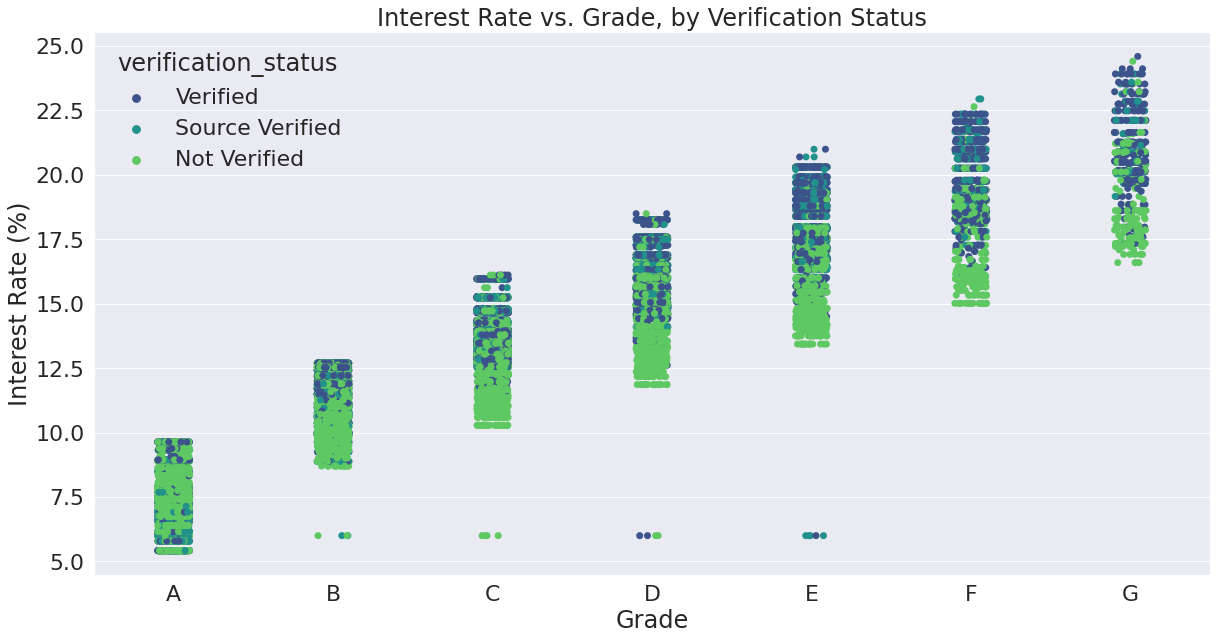

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='int_rate', hue='verification_status',data=df, palette='viridis', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Interest Rate vs. Grade, by Verification Status")
ax.set(xlabel='Grade', ylabel='Interest Rate (%)')
plt.show()

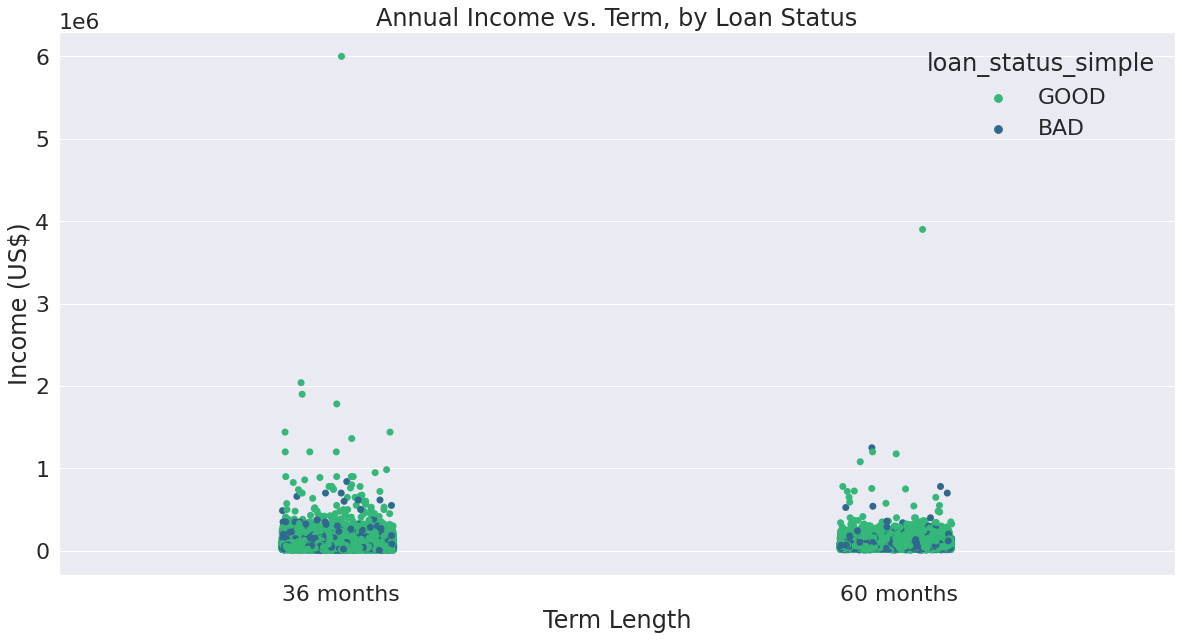

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='term', y='annual_inc',hue='loan_status_simple', data=df, palette='viridis_r', size=7)
plt.title("Annual Income vs. Term, by Loan Status")
ax.set(xlabel='Term Length', ylabel='Income (US$)')
plt.show()

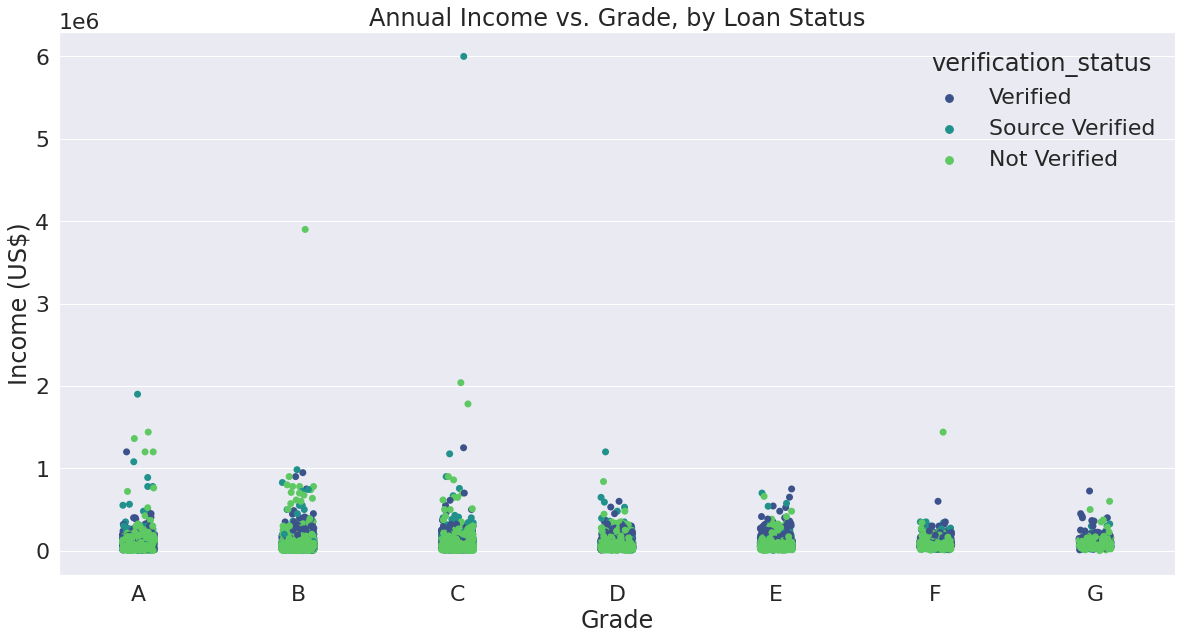

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='annual_inc', hue='verification_status',data=df, palette='viridis', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Annual Income vs. Grade, by Loan Status")
ax.set(xlabel='Grade', ylabel='Income (US$)')
plt.show()

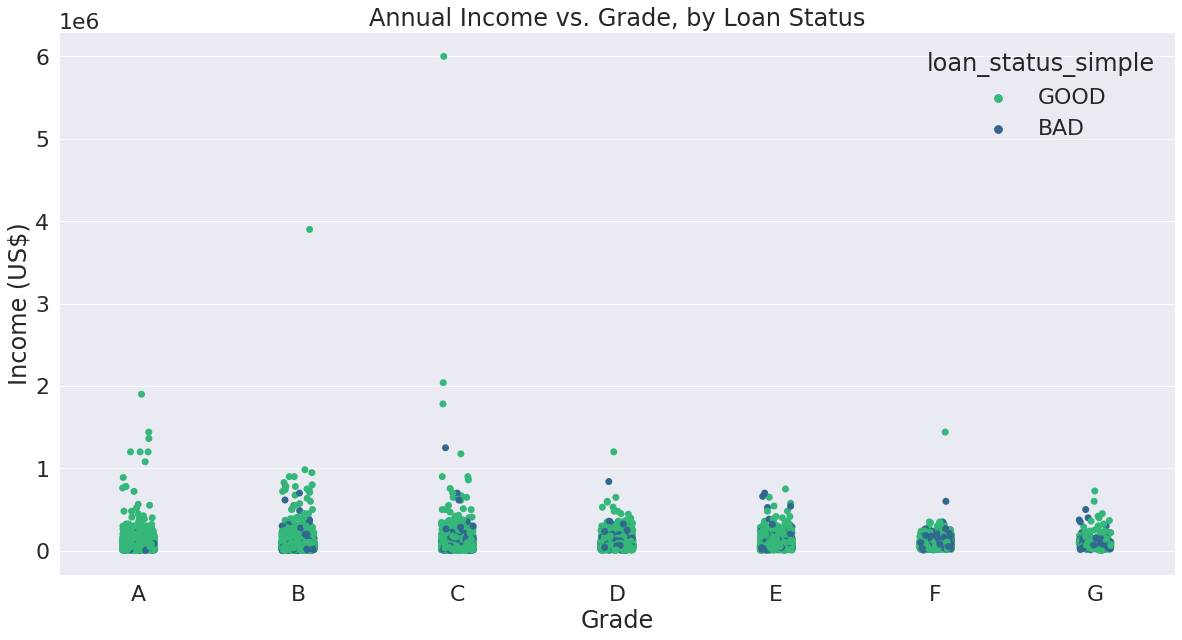

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='annual_inc', hue='loan_status_simple',data=df, palette='viridis_r', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Annual Income vs. Grade, by Loan Status")
ax.set(xlabel='Grade', ylabel='Income (US$)')
plt.show()

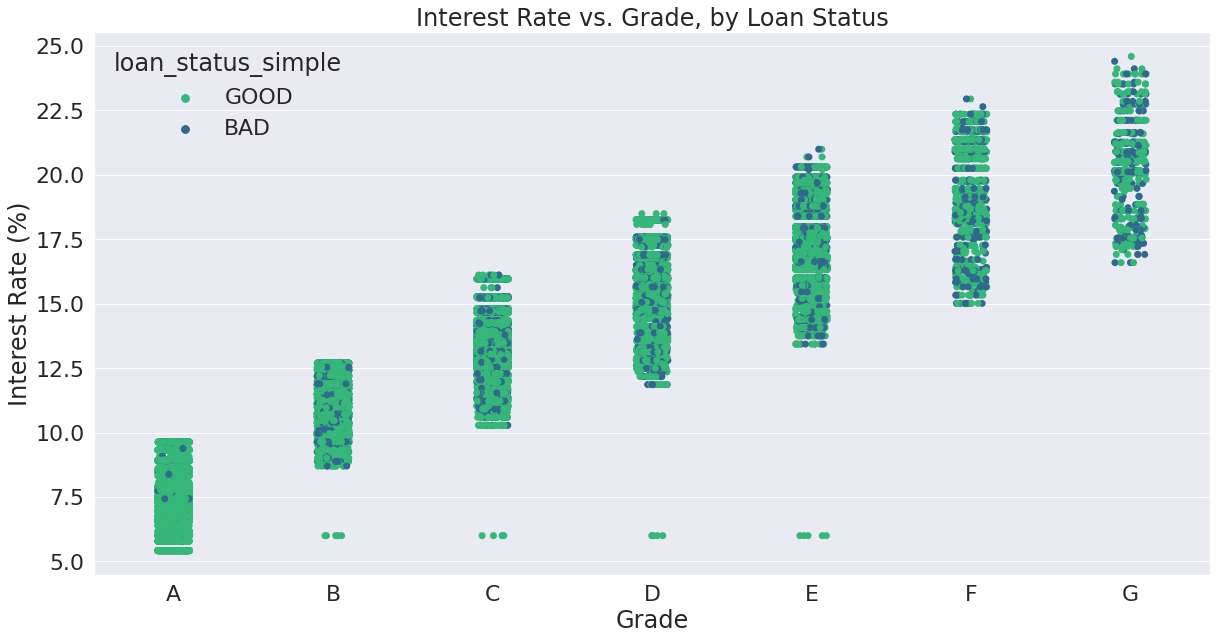

In [ ]:

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='int_rate', data=df,  hue='loan_status_simple',palette='viridis_r', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Interest Rate vs. Grade, by Loan Status")
ax.set(xlabel='Grade', ylabel='Interest Rate (%)')
plt.show()

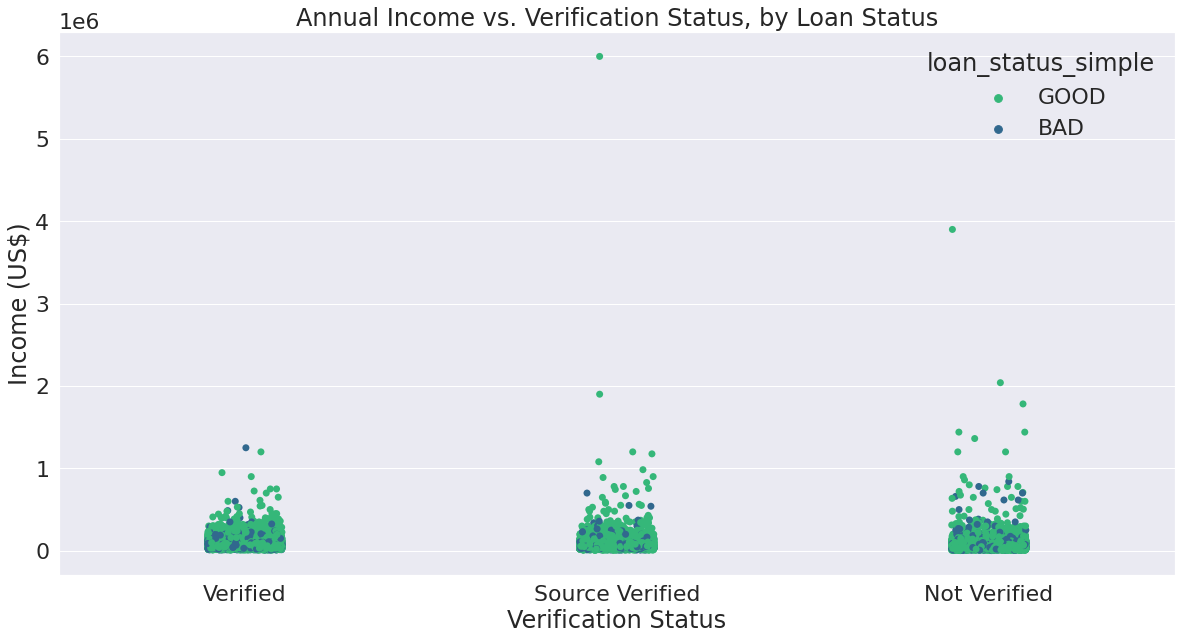

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='verification_status', y='annual_inc', data=df,  hue='loan_status_simple',palette='viridis_r', size=7)
plt.title("Annual Income vs. Verification Status, by Loan Status")
ax.set(xlabel='Verification Status', ylabel='Income (US$)')
plt.show()

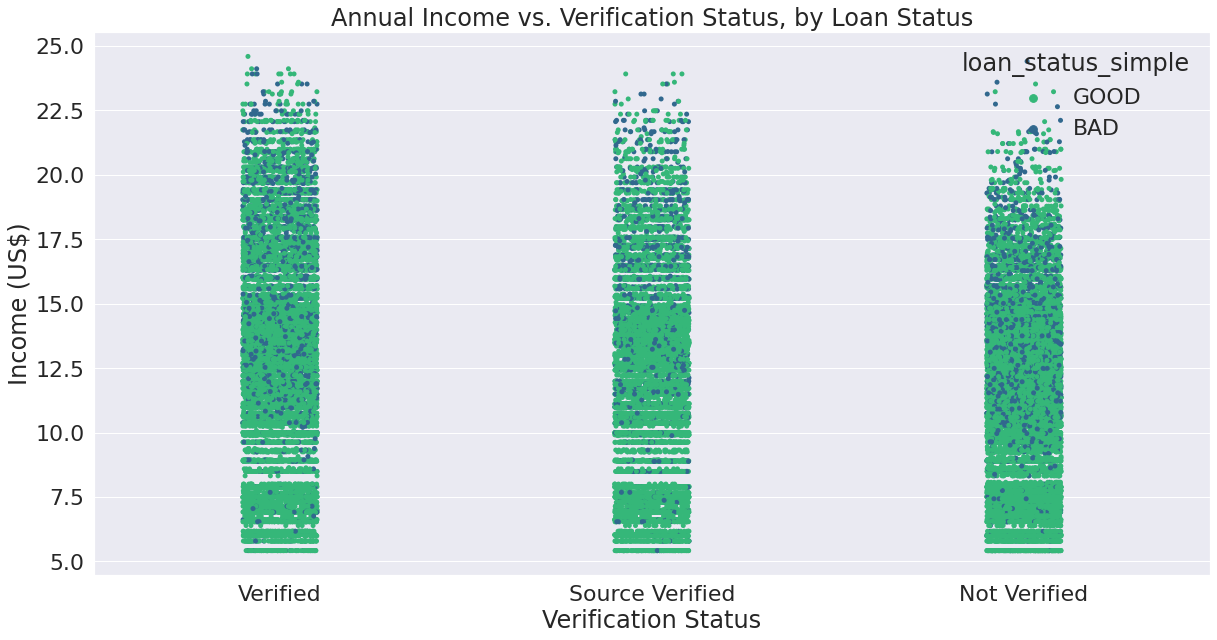

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='verification_status', y='int_rate', data=df,  hue='loan_status_simple',palette='viridis_r', size=5)
plt.title("Annual Income vs. Verification Status, by Loan Status")
ax.set(xlabel='Verification Status', ylabel='Income (US$)')
plt.show()

<Figure size 1440x720 with 0 Axes>

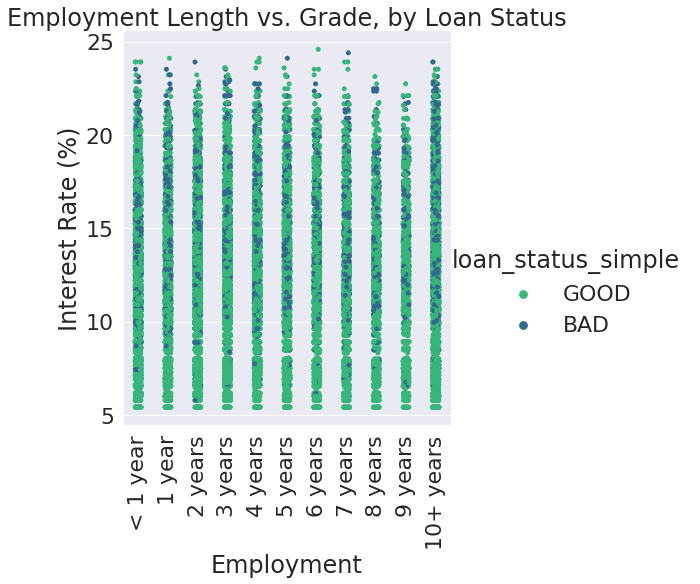

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.catplot(x='emp_length', y='int_rate', hue='loan_status_simple',data=df, palette='viridis_r', size=7, order=['< 1 year','1 year','2 years', '3 years', '4 years', '5 years','6 years', '7 years', '8 years', '9 years','10+ years'])
plt.title("Employment Length vs. Grade, by Loan Status")
ax.set(xlabel='Employment', ylabel='Interest Rate (%)')
ax.set_xticklabels(rotation=90)
plt.show()

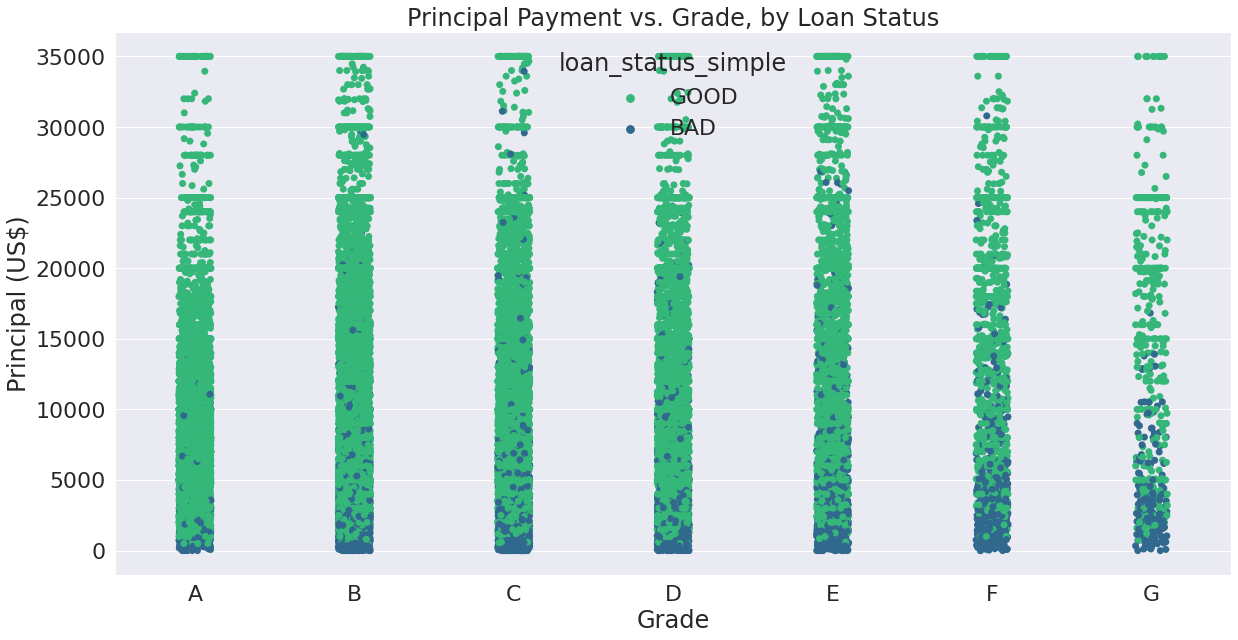

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='total_rec_prncp', data=df,  hue='loan_status_simple',palette='viridis_r', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Principal Payment vs. Grade, by Loan Status")
ax.set(xlabel='Grade', ylabel='Principal (US$)')
plt.show()

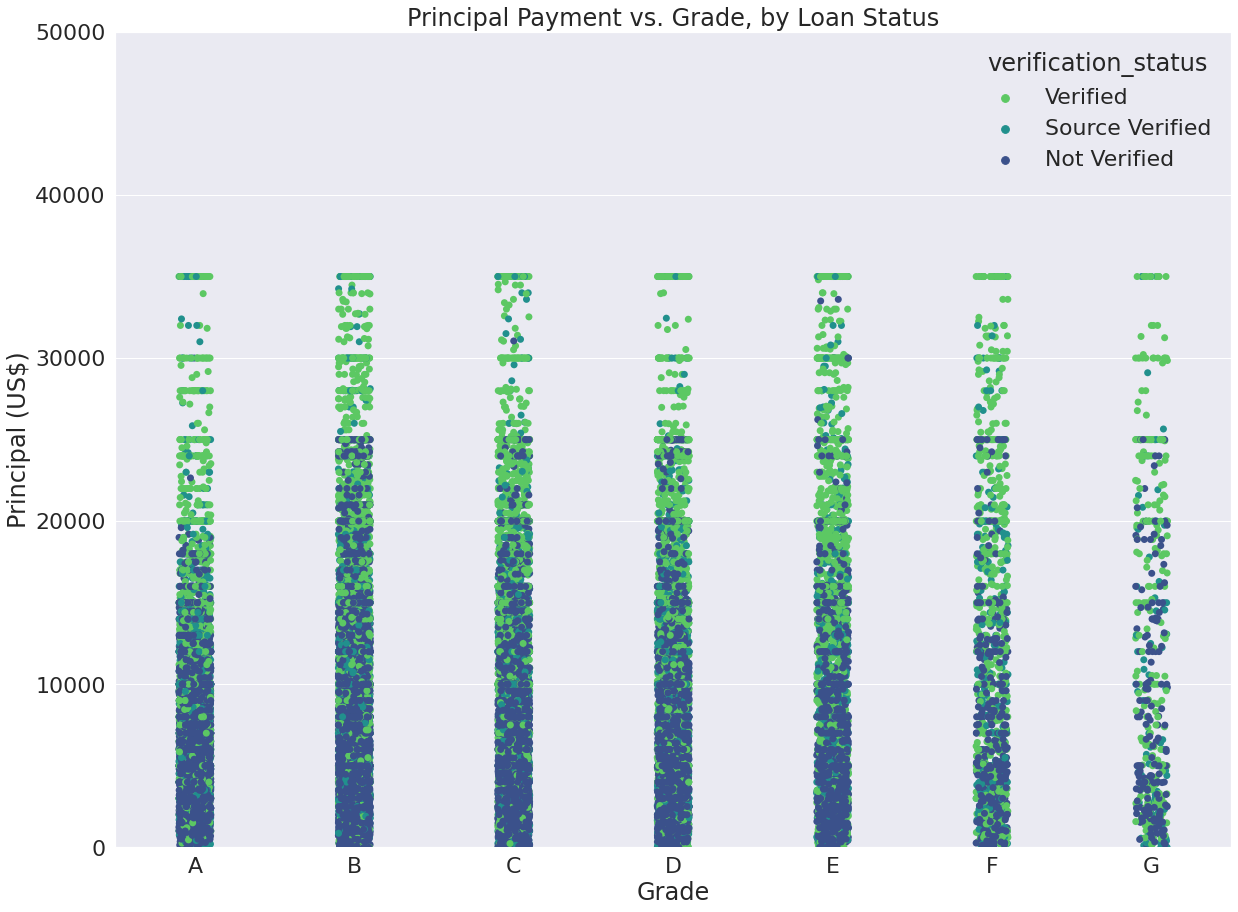

In [ ]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='total_rec_prncp', data=df,  hue='verification_status',palette='viridis_r', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Principal Payment vs. Grade, by Loan Status")
ax.set(xlabel='Grade', ylabel='Principal (US$)')
ax.set_ylim([0,50000])
plt.show()

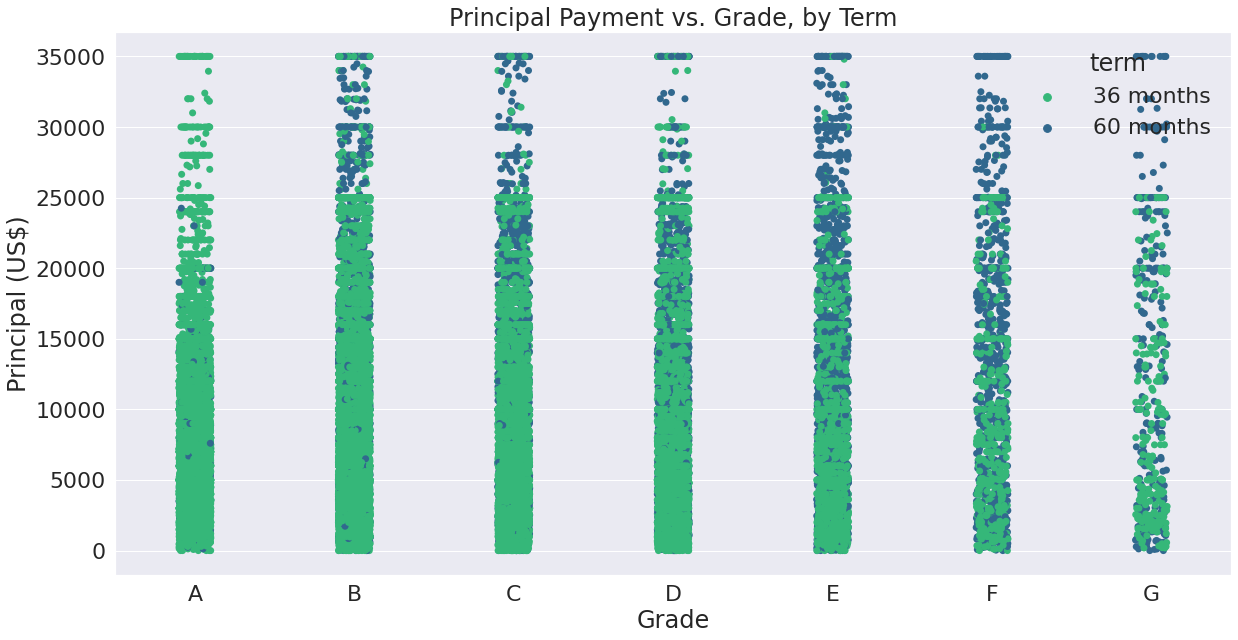

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.stripplot(x='grade', y='total_rec_prncp', data=df,  hue='term',palette='viridis_r', size=7, order=['A','B','C','D','E','F','G'])
plt.title("Principal Payment vs. Grade, by Term")
ax.set(xlabel='Grade', ylabel='Principal (US$)')
plt.show()

## Other Plots

<Figure size 1440x720 with 0 Axes>

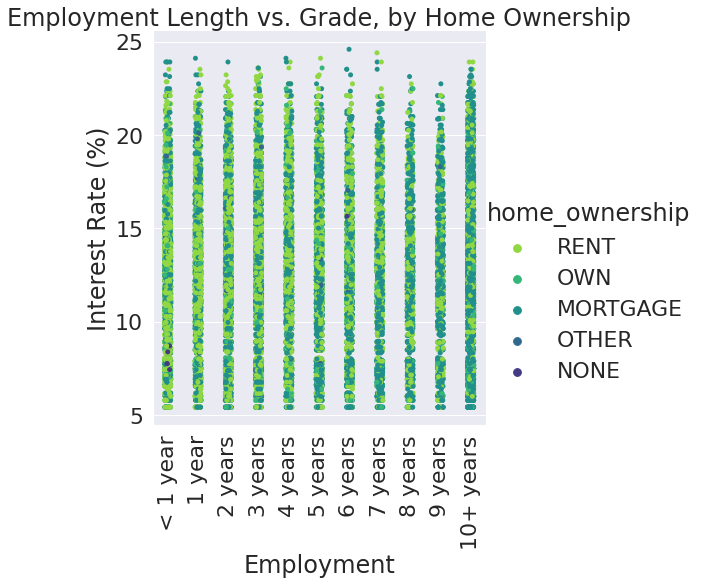

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax=sns.catplot(x='emp_length', y='int_rate', hue='home_ownership',data=df, palette='viridis_r', size=7, order=['< 1 year','1 year','2 years', '3 years', '4 years', '5 years','6 years', '7 years', '8 years', '9 years','10+ years'])
plt.title("Employment Length vs. Grade, by Home Ownership")
ax.set(xlabel='Employment', ylabel='Interest Rate (%)')
ax.set_xticklabels(rotation=90)
plt.show()

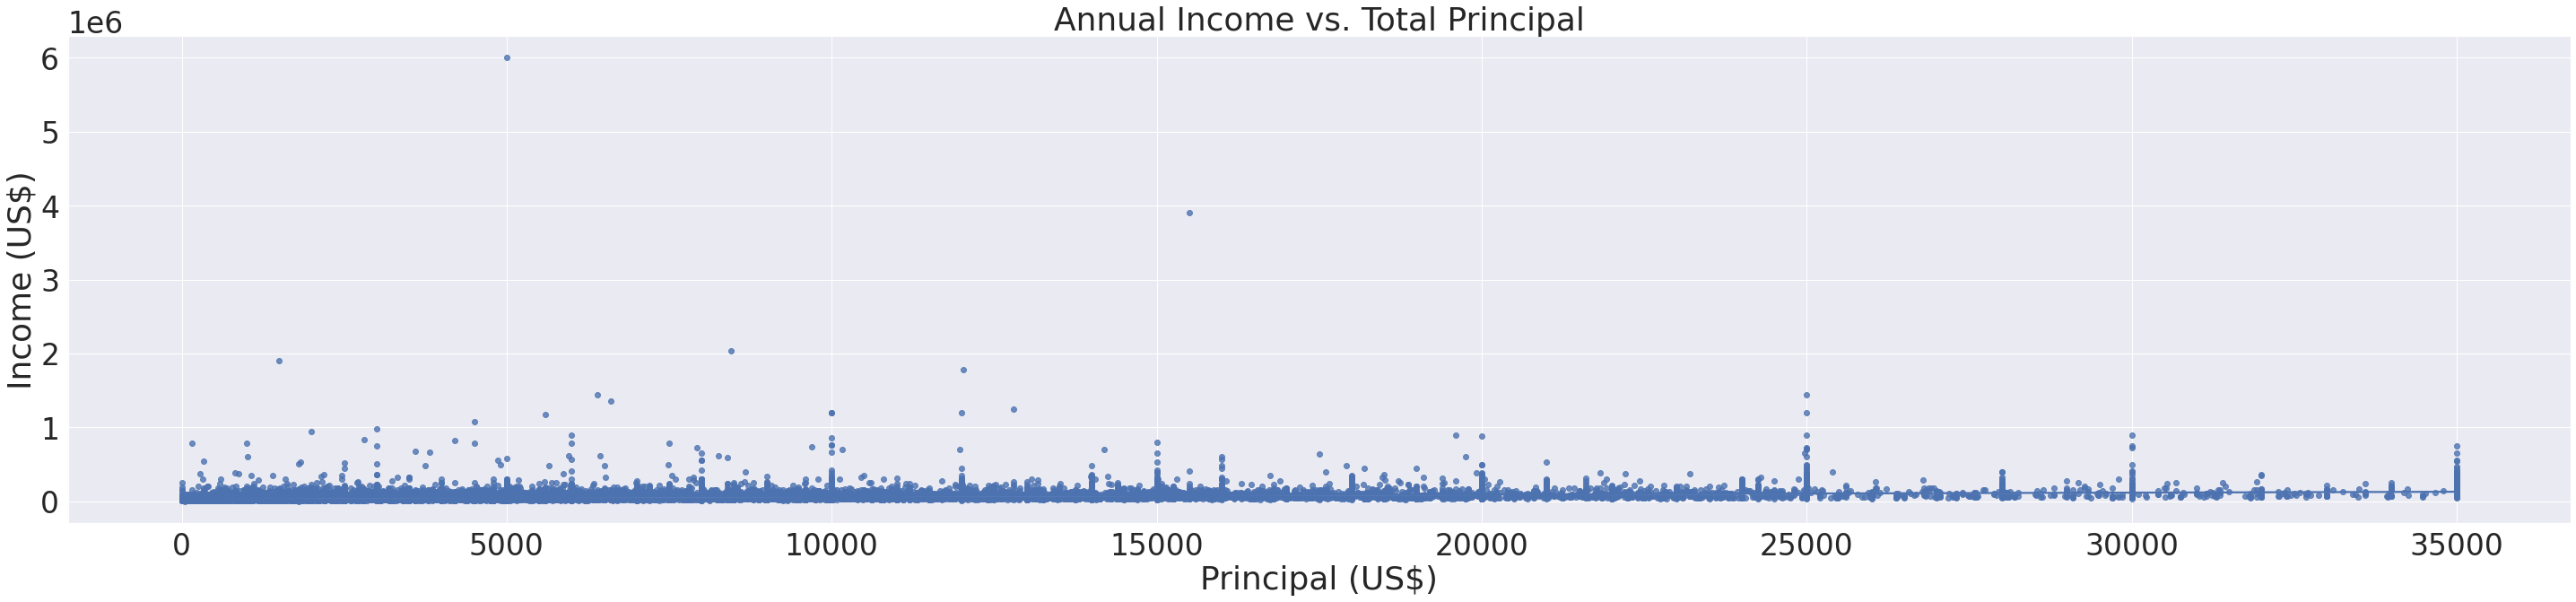

In [ ]:
plt.figure(figsize=(50,10))

sns.set(font_scale=3)
ax=sns.regplot(y='annual_inc', x='total_rec_prncp', data=x)
plt.title("Annual Income vs. Total Principal")
ax.set(xlabel='Principal (US$)', ylabel='Income (US$)')

plt.show()

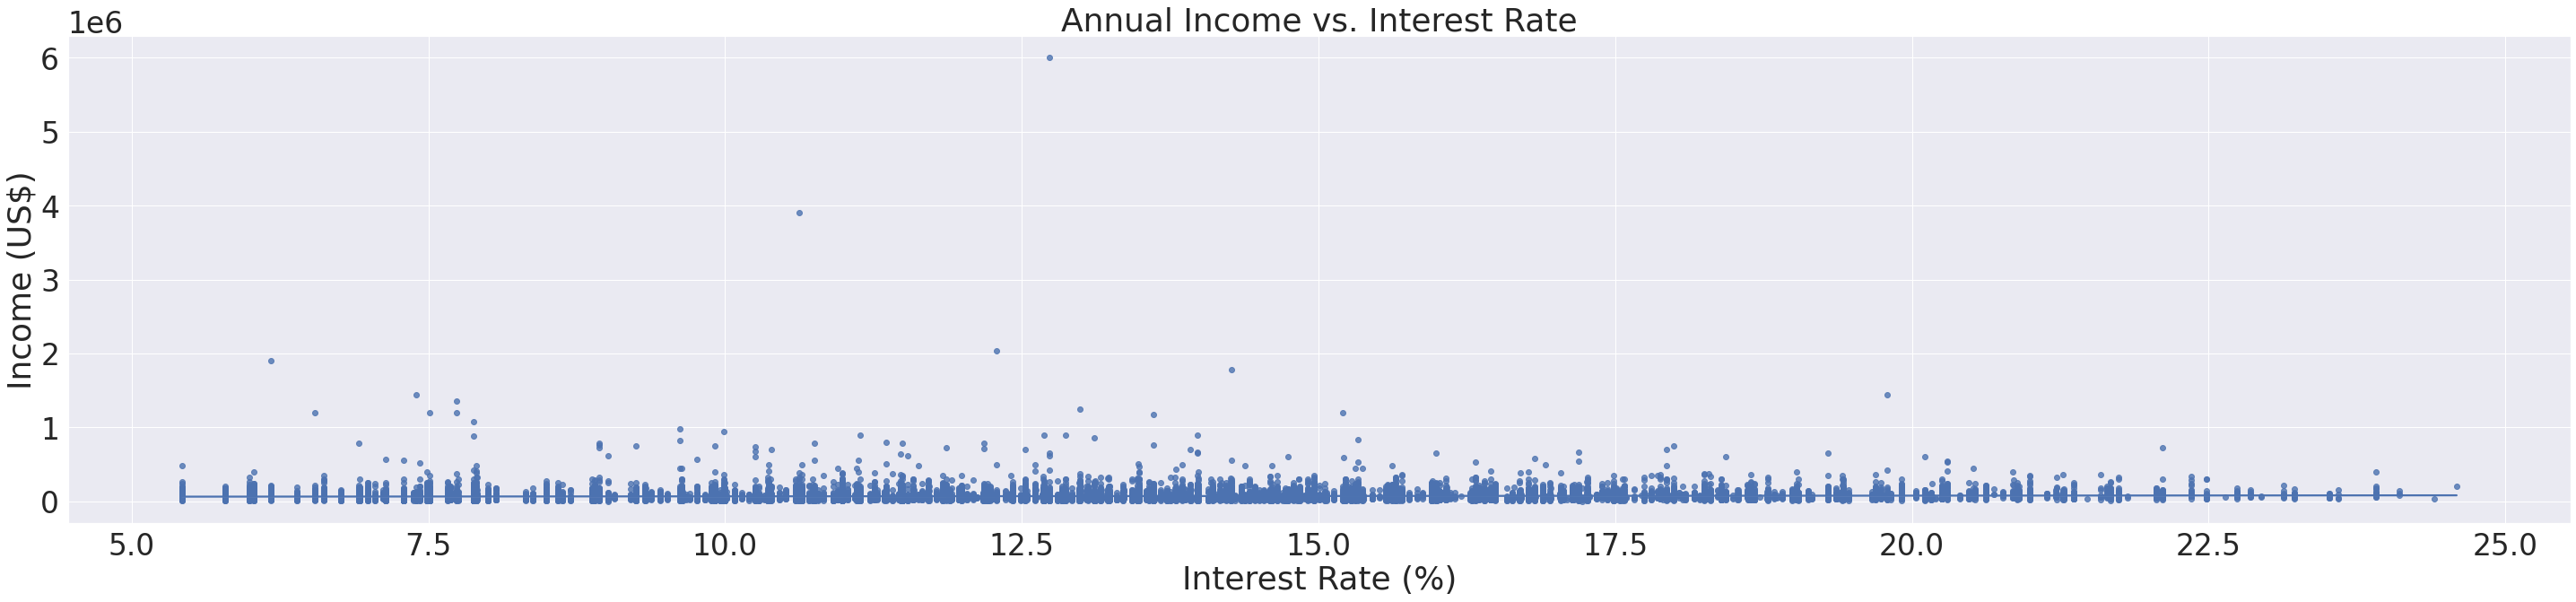

In [ ]:
plt.figure(figsize=(50,10))

sns.set(font_scale=3)
ax=sns.regplot(y='annual_inc', x='int_rate', data=x)
plt.title("Annual Income vs. Interest Rate")
ax.set(xlabel='Interest Rate (%)', ylabel='Income (US$)')

plt.show()